In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [24]:
# protected_attributes = ['age', 'sex', 'marital_status', 'own_telephone', 'employment'] # gc

protected_attributes = ["SEX", "MAR", "AGEP", "NATIVITY", "MIG"] # ft

n = len(protected_attributes)

In [25]:
# gc
# budget = 100
# root_dir = f'/home/dhasade/audits/ml-audits/results/multicolab_b{budget}'

# ft
budget = 500
root_dir = f'/home/dhasade/audits/ml-audits/results/folktables/multicolab_b{budget}'

In [26]:
strategy = 'aposteriori'
agentwise_dps = [[] for _ in range(n)]
for base_agent in range(n):
    attr = protected_attributes[base_agent]

    all_files = os.listdir(root_dir)

    base_agent_files = [f for f in all_files if attr in f]

    for k in range(2, n+1):

        files_k = [f for f in base_agent_files if f'n{k}' in f and strategy in f]
        print(f'Number of files: {len(files_k)} for k={k} and attr={attr}')

        ds_k = []
        for f in files_k:
            df = pd.read_csv(os.path.join(root_dir, f))
            dp = df[df['attribute'] == attr]['dp_error'].mean()
            # print(dp)
            ds_k.append(dp)
        
        agentwise_dps[base_agent].append(np.mean(ds_k))
aposteriori_dps = agentwise_dps

Number of files: 4 for k=2 and attr=SEX
Number of files: 6 for k=3 and attr=SEX
Number of files: 4 for k=4 and attr=SEX
Number of files: 1 for k=5 and attr=SEX
Number of files: 4 for k=2 and attr=MAR
Number of files: 6 for k=3 and attr=MAR
Number of files: 4 for k=4 and attr=MAR
Number of files: 1 for k=5 and attr=MAR
Number of files: 4 for k=2 and attr=AGEP
Number of files: 6 for k=3 and attr=AGEP
Number of files: 4 for k=4 and attr=AGEP
Number of files: 1 for k=5 and attr=AGEP
Number of files: 4 for k=2 and attr=NATIVITY
Number of files: 6 for k=3 and attr=NATIVITY
Number of files: 4 for k=4 and attr=NATIVITY
Number of files: 1 for k=5 and attr=NATIVITY
Number of files: 4 for k=2 and attr=MIG
Number of files: 6 for k=3 and attr=MIG
Number of files: 4 for k=4 and attr=MIG
Number of files: 1 for k=5 and attr=MIG


In [27]:
strategy = 'apriori'
agentwise_dps = [[] for _ in range(n)]
for base_agent in range(n):
    attr = protected_attributes[base_agent]

    all_files = os.listdir(root_dir)

    base_agent_files = [f for f in all_files if attr in f]

    for k in range(2, n+1):

        files_k = [f for f in base_agent_files if f'n{k}' in f and strategy in f]
        print(f'Number of files: {len(files_k)} for k={k} and attr={attr}')

        ds_k = []
        for f in files_k:
            df = pd.read_csv(os.path.join(root_dir, f))
            dp = df[df['attribute'] == attr]['dp_error'].mean()
            # print(dp)
            ds_k.append(dp)
        
        agentwise_dps[base_agent].append(np.mean(ds_k))
apriori_dps = agentwise_dps

Number of files: 4 for k=2 and attr=SEX
Number of files: 6 for k=3 and attr=SEX
Number of files: 4 for k=4 and attr=SEX
Number of files: 1 for k=5 and attr=SEX
Number of files: 4 for k=2 and attr=MAR
Number of files: 6 for k=3 and attr=MAR
Number of files: 4 for k=4 and attr=MAR
Number of files: 1 for k=5 and attr=MAR
Number of files: 4 for k=2 and attr=AGEP
Number of files: 6 for k=3 and attr=AGEP
Number of files: 4 for k=4 and attr=AGEP
Number of files: 1 for k=5 and attr=AGEP
Number of files: 4 for k=2 and attr=NATIVITY
Number of files: 6 for k=3 and attr=NATIVITY
Number of files: 4 for k=4 and attr=NATIVITY
Number of files: 1 for k=5 and attr=NATIVITY
Number of files: 4 for k=2 and attr=MIG
Number of files: 6 for k=3 and attr=MIG
Number of files: 4 for k=4 and attr=MIG
Number of files: 1 for k=5 and attr=MIG


In [28]:
all_files = os.listdir(root_dir)
none_file = [f for f in all_files if 'none' in f][0]

none_dps = []
for attr in protected_attributes:
    df = pd.read_csv(os.path.join(root_dir, none_file))
    dp = df[df['attribute'] == attr]['dp_error'].mean()
    none_dps.append(dp)

In [29]:
for i in range(n):
    apriori_dps[i] = [none_dps[i]] + apriori_dps[i]
    aposteriori_dps[i] = [none_dps[i]] + aposteriori_dps[i]

In [30]:
# compute_gain_ratio
gain_ratio_apriori = [[] for _ in range(n)]
gain_ratio_aposteriori = [[] for _ in range(n)]
for i in range(n):
    for k in range(n):
        gain_ratio_apriori[i].append(apriori_dps[i][0]/ apriori_dps[i][k])
        gain_ratio_aposteriori[i].append(aposteriori_dps[i][0]/ aposteriori_dps[i][k])

In [31]:
cumulative_gain_ratio_aposteriori = np.array(gain_ratio_aposteriori).sum(axis=0)
cumulative_gain_ratio_apriori = np.array(gain_ratio_apriori).sum(axis=0)

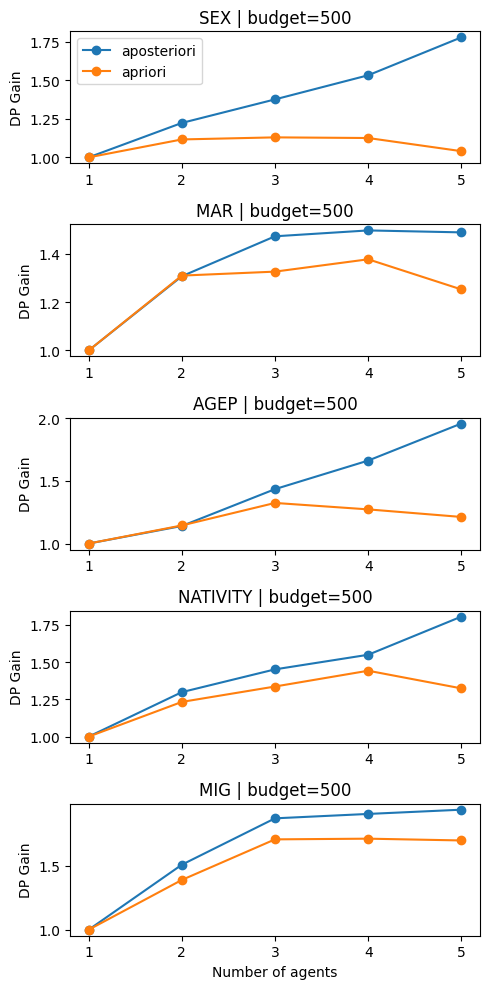

In [26]:
# create subplots (agents), show 2 strategies in same subplot
fig, axs = plt.subplots(n, 1, figsize=(5, 10))
for i in range(n):
    axs[i].plot(range(n), gain_ratio_aposteriori[i], 'o-', label='aposteriori')
    axs[i].plot(range(n), gain_ratio_apriori[i], 'o-', label='apriori')
    axs[i].set_title(f'{protected_attributes[i]} | budget={budget}')
    axs[i].set_ylabel('DP Gain')
    axs[i].set_xticks(range(n))
    axs[i].set_xticklabels(list(range(1, n+1)))
    
axs[0].legend()
axs[n-1].set_xlabel('Number of agents')
plt.tight_layout()
# plt.savefig(f'../results/latest/german_credit_multicolab_gain_b{budget}.pdf', dpi=200)


In [79]:
protected_attributes = [x.replace('_', ' ').title() for x in protected_attributes]

In [80]:
s = 7
params = {
   'legend.fontsize': s,
   'xtick.labelsize': 6,
   'ytick.labelsize': 6,
   'axes.labelsize': s,
   'text.usetex': False,
   # 'figure.figsize': [1.3, 1.1],
   'figure.figsize': [8, 1.1],
   'lines.linewidth': 1,
   'lines.markersize': 3,
   'axes.titlesize': s,
   }

# set rc params
plt.rcParams.update(params)
# no background for the legend
plt.rc('legend', frameon=False)    # no background for the legend


/tmp/ipykernel_751900/3470603939.py:17: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


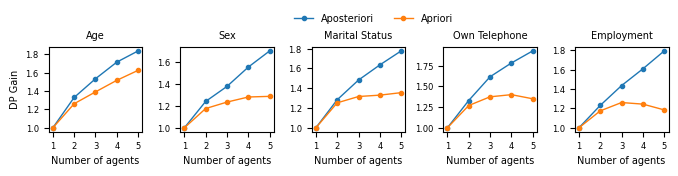

In [82]:
# create subplots (agents), show 2 strategies in same subplot
fig, axs = plt.subplots(1, n)
for i in range(n):
    axs[i].plot(range(n), gain_ratio_aposteriori[i], 'o-', label='Aposteriori')
    axs[i].plot(range(n), gain_ratio_apriori[i], 'o-', label='Apriori')
    axs[i].set_title(f'{protected_attributes[i]}')
    # axs[i].set_ylabel('Gain')
    axs[i].set_xticks(range(n))
    axs[i].set_xticklabels(list(range(1, n+1)))
    axs[i].set_xlabel('Number of agents')

axs[0].set_ylabel('DP Gain')
axs[1].legend()
axs[1].legend(bbox_to_anchor=(3, 1.5), loc='upper right', ncol=3)

plt.subplots_adjust(wspace=0.4)
plt.tight_layout()
# plt.savefig(f'../results/plots/ft_multicolab_gain_b{budget}.pdf', dpi=300, bbox_inches='tight')
# plt.savefig(f'../results/plots/gc_multicolab_gain_b{budget}.pdf', dpi=300, bbox_inches='tight')


In [32]:
s = 7
params = {
   'legend.fontsize': s,
   'xtick.labelsize': 6,
   'ytick.labelsize': 6,
   'axes.labelsize': s,
   'text.usetex': False,
   'figure.figsize': [2.3, 1.1],
#    'figure.figsize': [8, 1.1],
   'lines.linewidth': 1,
   'lines.markersize': 3,
   'axes.titlesize': s,
   }

# set rc params
plt.rcParams.update(params)
# no background for the legend
plt.rc('legend', frameon=False)    # no background for the legend


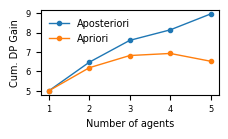

In [34]:
# plot cumulative gain ratio
plt.plot(range(1, n+1), cumulative_gain_ratio_aposteriori, 'o-', label='Aposteriori')
plt.plot(range(1, n+1), cumulative_gain_ratio_apriori, 'o-', label='Apriori')

plt.ylabel('Cum. DP Gain')
plt.xlabel('Number of agents')
plt.legend()
# plt.savefig(f'../results/plots/ft_multicolab_cumulative_gain_b{budget}.pdf', dpi=300, bbox_inches='tight')